In [9]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [10]:
A = np.loadtxt('trainingdata.train')
Asize = A.shape # via property of element
#print ("A size: ", Asize)
#print(A)
t=[[0,3],[0,3]]
p=[[3,0],[0,0]]
#print(t)
#print(cdist(t,p))

In [11]:
#fig0 = plt.figure()
#ax0 = fig0.add_subplot( 111 )
#ax0.scatter( A[:,3], A[:,4] )
#plt.show()
#significant columns found

In [12]:
B = np.matrix([A[:,3], A[:,4]]).T
Bsize = B.shape # via property of element
print ("B size: ", Bsize)
#print(B)

B size:  (150, 2)


In [13]:
kmeans = KMeans(n_clusters=4, random_state=1000).fit(B)
#print(kmeans.cluster_centers_)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
#print(labels)
#print(centroids[2])


In [14]:
a = np.matrix([0,0])
b = np.matrix([0,0])
c = np.matrix([0,0])
d = np.matrix([0,0])

for x in range(0,150):
    if labels[x] == 0 :
        a = np.concatenate((a,B[x,:]))
    elif labels[x] == 1 :
        b = np.concatenate((b,B[x,:]))
    elif labels[x] == 2 :
        c = np.concatenate((c,B[x,:]))
    elif labels[x] == 3 :
        d = np.concatenate((d,B[x,:]))
        
a = np.delete(a, (0), axis=0)
b = np.delete(b, (0), axis=0)
c = np.delete(c, (0), axis=0)
d = np.delete(d, (0), axis=0)
#print(a)
#print(b)
#print(c)


/Users/felixwilliams/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


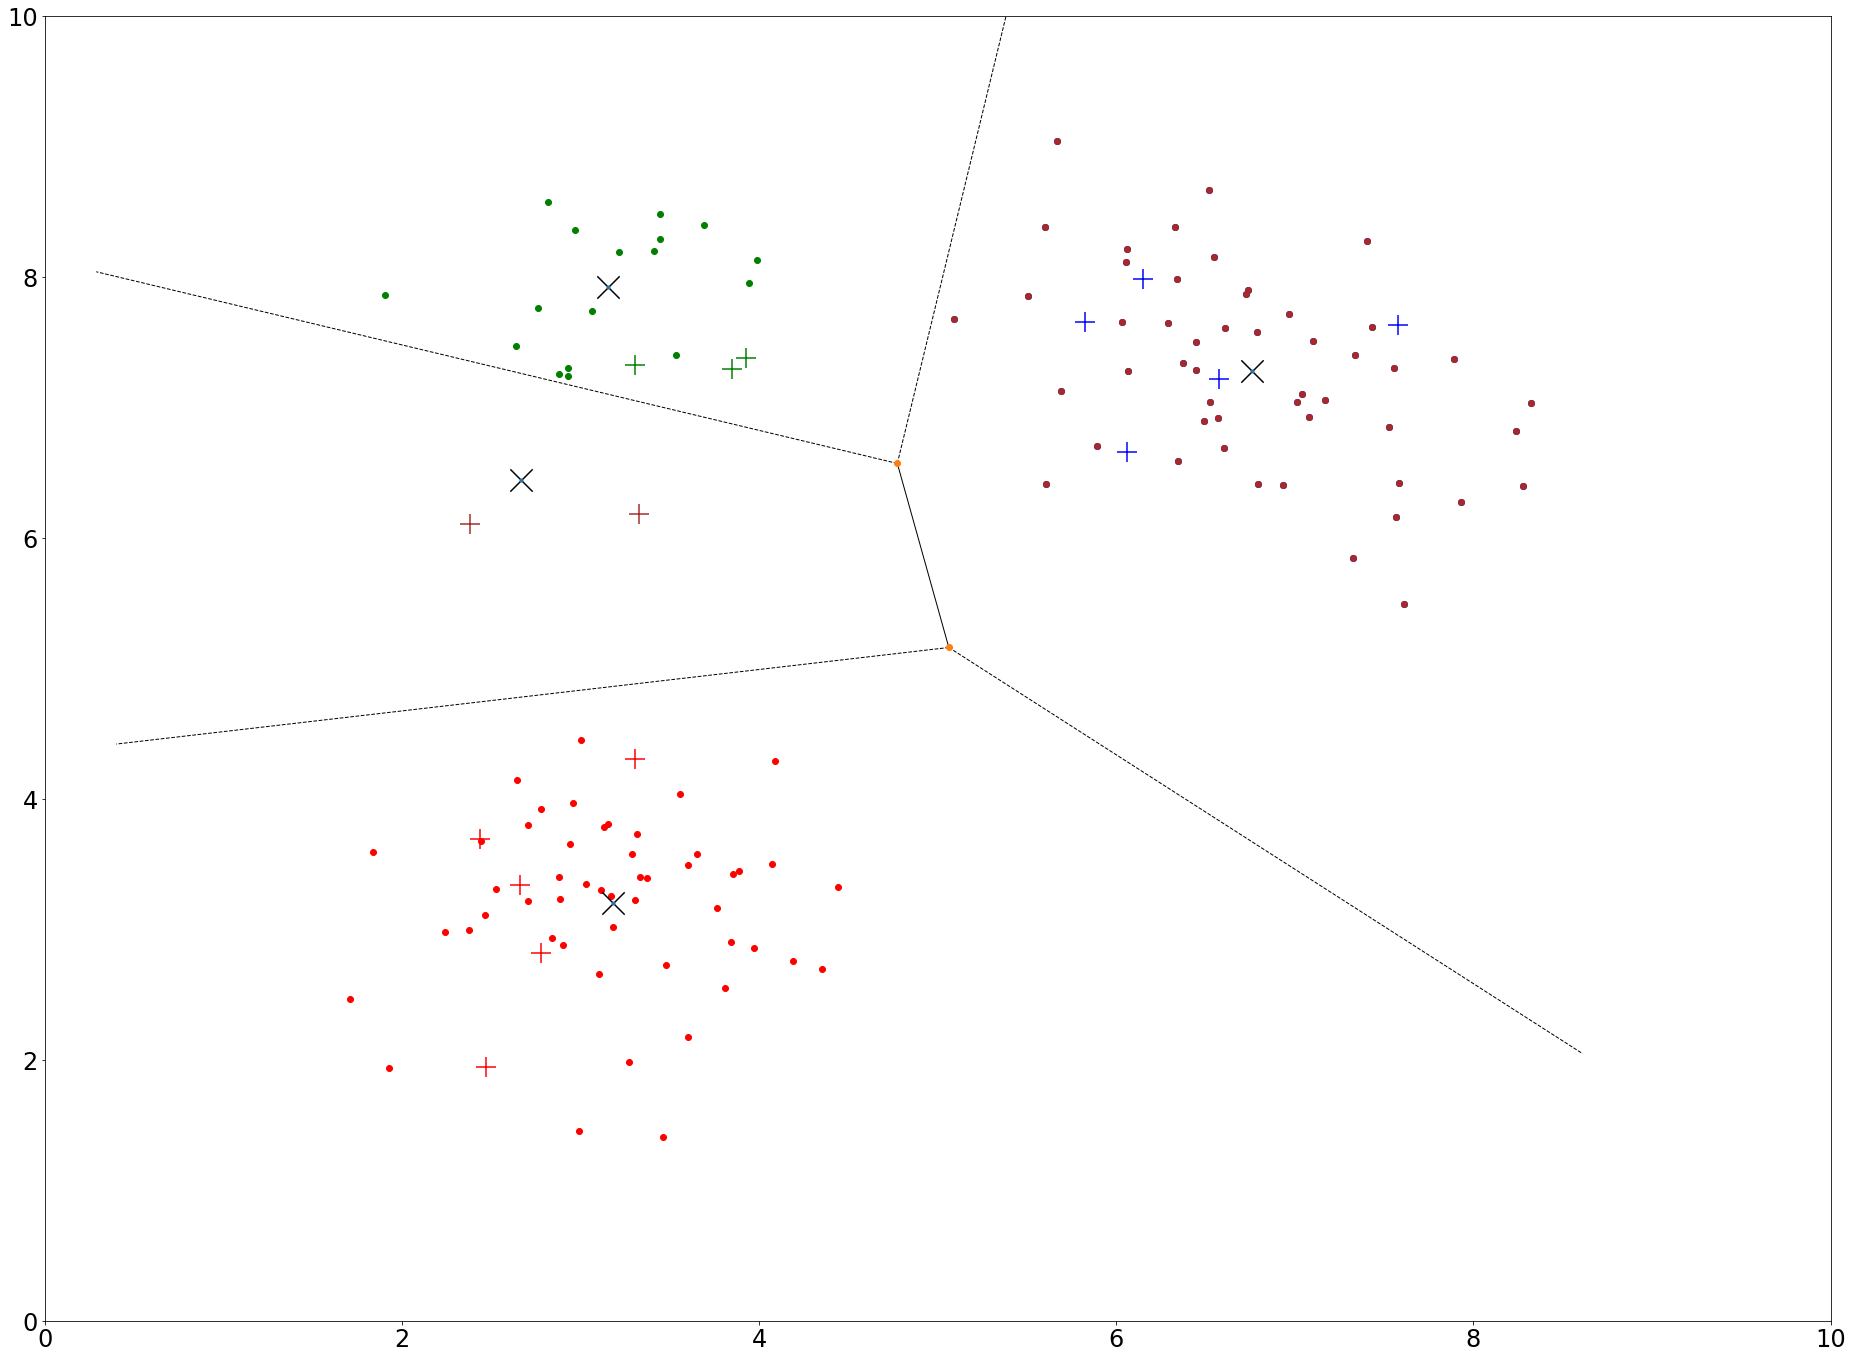

In [15]:

ax = np.squeeze(np.asarray(a[:,0]))
ay = np.squeeze(np.asarray(a[:,1]))
bx = np.squeeze(np.asarray(b[:,0]))
by = np.squeeze(np.asarray(b[:,1]))
cx = np.squeeze(np.asarray(c[:,0]))
cy = np.squeeze(np.asarray(c[:,1]))
dx = np.squeeze(np.asarray(c[:,0]))
dy = np.squeeze(np.asarray(c[:,1]))

centroidx = np.squeeze(np.asarray(centroids[:,0]))
centroidy = np.squeeze(np.asarray(centroids[:,1]))


    
vor = Voronoi(centroids)
fig = voronoi_plot_2d(vor)
axis = fig.add_subplot( 111 )
axis.set_xlim([0,10])
axis.set_ylim([0,10])
axis.scatter( ax, ay, c='r' )
axis.scatter( bx, by, c='g' )
axis.scatter( cx, cy, c='b' )
axis.scatter( dx, dy, c='brown' )
axis.scatter( centroidx, centroidy, c='black', marker = 'x', s=500 )

#vor = Voronoi(centroids)
#voronoi_plot_2d(vor) 

#axis = fig.add_subplot( )

testfile = np.loadtxt('testdata.test')
testdata = np.squeeze(np.asarray([testfile[:,3],testfile[:,4]])).T
#print(testdata)

cdistance = cdist(testdata,centroids)
#print(cdistance)
colourlist = []
for x in range(0,15):
    centroid = np.argmin(cdistance[x,:])
    #print(centroid)
    if(centroid==0):
        colourlist.append('r')
    elif(centroid==1):
        colourlist.append('g')
    elif(centroid==2):
        colourlist.append('b')
    elif(centroid==3):
        colourlist.append('brown')
    
#print(colourlist)
    

testx = np.squeeze(np.asarray(testdata[:,0]))
testy = np.squeeze(np.asarray(testdata[:,1]))

for x in range(0,15):
    axis.scatter( testx[x], testy[x], c=colourlist[x], s=400, marker='+')

#vor = Voronoi(centroids)    
#voronoi_plot_2d(vor)

plt.show()

